# Fihser Classifier

**Provided by Javad Saghi**

Contact: jav.saghi@gmail.com 


The Fisher classifier, often referred to as Fisher's Linear Discriminant (FLD) or Linear Discriminant Analysis (LDA), is a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events.

Consider a binary classification problem with two classes: $C_1$ and $C_2$​. Each sample $x$ belongs to one of  these classes. We aim to find a projection vector $w$ such that the projection of samples onto this vector maximizes the seperation between the two classes. as following image:

!['Fisher'](../Classification/Image_Classification/Fisher_Classifier.png)

In this projection we have:
$$ y = \vec{\bold{w}}^\top \vec{\bold{x}} + b $$

First moment of samples after projecting them onto this vector would be:
$$ 
\mu_1 = \mathbb{E} \left\{y | \omega_1 \right\} = \mathbb{E} \left\{\bold{w}^\top \bold{x} | \omega_1 \right\} + \mathbb{E}\left\{b \right\} \\

\mu_2 = \mathbb{E} \left\{y | \omega_2 \right\} = \mathbb{E} \left\{\bold{w}^\top \bold{x} | \omega_2 \right\} + \mathbb{E}\left\{b \right\}
$$

We've considered that $w$ to be a determinestic parameter, therefore:
$$ 
\mu_1 = \bold{w}^\top  \underbrace{\mathbb{E} \left\{\bold{x} | \omega_1 \right\}}_{m_1} + \underbrace{\mathbb{E}\left\{b \right\}}_{b} \Rightarrow \boxed{\mu_1 = \bold{w}^\top \bold{m_1} + b} \\

\mu_2 = \bold{w}^\top  \underbrace{\mathbb{E} \left\{\bold{x} | \omega_2 \right\}}_{m_2} + \underbrace{\mathbb{E}\left\{b \right\}}_{b} \Rightarrow \boxed{\mu_2 = \bold{w}^\top \bold{m_2} + b}
$$

We've come to the coclusion that "the first moment of projected samples" is equal to "projection of the first moment of samples".

## Mean and Variance in Projection Sapce

Second moment of samples after projecting them onto this vector would be:
$$
\sigma_1^2 = \mathbb{E} \left\{ \left( y-\mu_1 \right)^2 \vert \omega_1 \right\} \\
= \mathbb{E} \left\{ \left( \bold{w}^\top \left( x - \bold{m_1} \right) \right)^2 \vert \omega_1 \right\} \\
= \mathbb{E} \left\{ \left( \bold{w}^\top \left( x - \bold{m_1} \right) \right) \left( \bold{w}^\top \left( x - \bold{m_1} \right) \right)^\top \vert \omega_1 \right\} \\
= \bold{w}^\top \underbrace{ \mathbb{E} \left\{ \left( x - \bold{m_1} \right) \left( x - \bold{m_1} \right)^\top \vert \omega_1 \right\} }_{\Sigma_1} \bold{w} \\[10px]
\Rightarrow \boxed{\sigma_1^2 = \bold{w}^\top \Sigma_1 \bold{w}}
$$

Similarly we can derive that:
$$
\boxed{\sigma_2^2 = \bold{w}^\top \Sigma_2 \bold{w}}
$$


## within-class and between-class scatter

Define the within-class scatter matrix $S_W$ and the between-class scatter matrix $S_B$.

### Within-Class Scatter Matrix
We need to minimize $(\sigma_1^2 + \sigma_2^2)$
$$
\min{\left(\sigma_1^2 + \sigma_2^2 \right)} \rightarrow \min{ \left(\bold{w}^\top \Sigma_1 \bold{w} + \bold{w}^\top \Sigma_2 \bold{w} \right)} \\[5px]
\rightarrow \min{ \bold{w}^\top \underbrace{\left( \Sigma_1 + \Sigma_2 \right)}_{S_W} \bold{w} } \\[5px]
\rightarrow \min{\bold{w}^\top S_W \bold{w}}
$$

### Between-Class Scatter Matrix

Also we need to maximize $ (\mu_1 - \mu_2)^2 $
$$
\max{(\mu_1 - \mu_2)^2} \rightarrow \max{ \left( \left( \bold{w}^\top \bold{m_1} + b \right) - \left( \bold{w}^\top \bold{m_2} + b\right)\right)^2} \\[5px]

\rightarrow \max{ \left( \left( \bold{w}^\top \bold{m_1} - \bold{w}^\top \bold{m_2} \right) \left( \bold{w}^\top \bold{m_1} - \bold{w}^\top \bold{m_2}\right)^\top \right)} \\[5px]

\rightarrow \max{ \left(\bold{w}^\top \underbrace{\left(\bold{m_1} - \bold{m_2} \right)\left( \bold{m_1}^\top - \bold{m_2}^\top \right)}_{S_B} \bold{w} \right)} \\[10px]

\rightarrow \max{ \bold{w}^\top S_B \bold{w}}
$$

## Objective Function 

We need to maximize the between-class scatter and minimize the within-class scater.

$$
\left\{\begin{matrix}\max{\bold{w}^\top S_B \bold{w}} \\ \min{\bold{w}^\top S_W \bold{w}}\end{matrix} \right.
$$

The objective is to minimize the following expression:

$$
\min{\left( \bold{w}^\top S_W \bold{w} - \bold{w}^\top S_B \bold{w} \right)}
$$

By setting the derivative respect to w equal to zero we get:

$$
S_W \bold{w} + S_W^\top \bold{w} - S_B \bold{w} - S_B^\top \bold{w} = 0
$$

We know that $S_B$ and $S_W$ are symmetric, so $S_B^\top = S_B$ and $S_W^\top = S_W$.

$$
S_W \bold{w} + S_W \bold{w} - S_B \bold{w} - S_B \bold{w} = 0 \\
2S_W \bold{w} - 2S_B \bold{w} = 0 \\
S_W \bold{w} = S_B \bold{w} \\
S_W \bold{w} = \left(m_2 - m_1\right)\underbrace{\left(m_2 - m_1\right)^\top \bold{w}}_{\text{scaler}}
$$

Because the lengh of $w$ does not matter, we can ignore the scaler part.

$$
S_W \bold{w} = \left(m_2 - m_1\right) \\
\Rightarrow \boxed{\bold{w} = S_W^{-1} \left(m_2 - m_1\right)}
$$

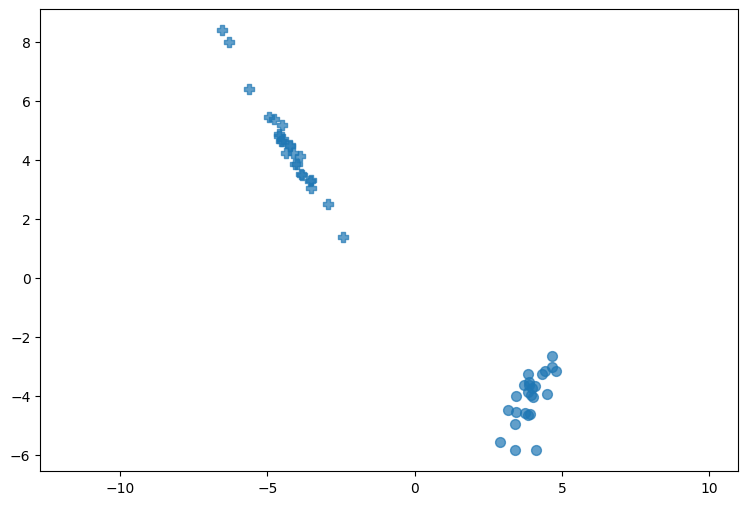

In [2]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification


# create a dataset
dataset_x, dataset_y = make_classification(n_samples=50,
                                           n_features=2,
                                           n_informative=2,
                                           n_repeated=0,
                                           n_redundant=0,
                                           n_classes=2,
                                           n_clusters_per_class=1,
                                           class_sep=4.0)


# show the dataset
plt.figure(1, figsize=[9, 6])
plt.axis('equal')
markers = ['o', 'P']
for i, marker in enumerate(markers):
    plt.scatter(dataset_x[dataset_y==i, 0],
                dataset_x[dataset_y==i, 1],
                marker=marker,
                s=50,
                alpha=0.7,
                c='tab:blue')



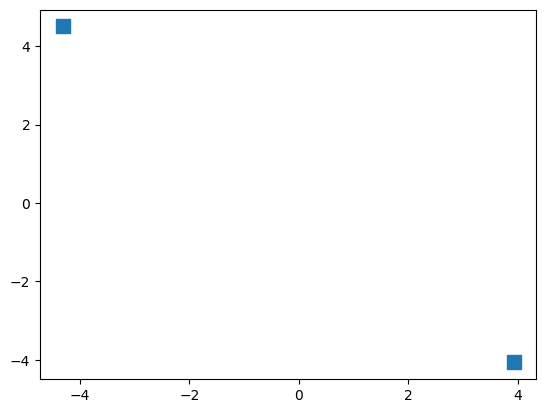

In [3]:

# calculate m1 and m2
m1 = np.mean(dataset_x[dataset_y==0], axis=0).reshape([-1, 1])
m2 = np.mean(dataset_x[dataset_y==1], axis=0).reshape([-1, 1])

# show m1 and m2
plt.scatter(m1[0], m1[1], marker='s', c='tab:blue', s=90);
plt.scatter(m2[0], m2[1], marker='s', c='tab:blue', s=90);

# calculate SB
SB = (m1 - m2) @ (m1.T - m2.T)

# calculate the covariance of each class
sigma1 = np.cov(dataset_x[dataset_y==0], rowvar=False)
sigma2 = np.cov(dataset_x[dataset_y==1], rowvar=False)

# calculate SW
SW = sigma1 + sigma2



## Obtaining Parameter 

Calculating w using following equation:

$$
\bold{w} = S_W^{-1} \left(m_2 - m_1\right)
$$

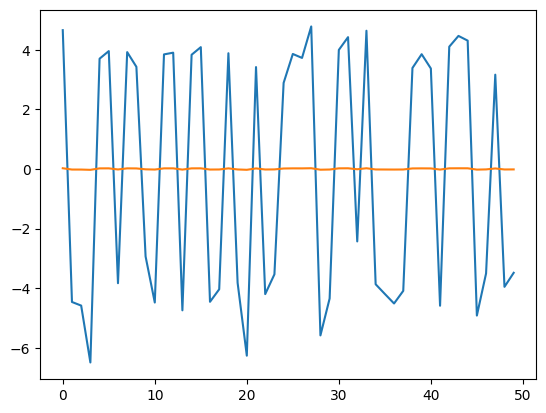

In [5]:
# calculate w
w = np.linalg.inv(SW) @ (m2 - m1).reshape(-1)
w = w / np.linalg.norm(w)

# project dataset onto the vector 'w'
p_dataset_x = ((dataset_x @ w) * w.reshape(-1, 1)).T

plt.plot(p_dataset_x)

## Bias claculation

Then we calculate parameter $b$ using a huristic method.

In [7]:
# calculate b
mu1 = np.mean((dataset_x[dataset_y == 0] @ w), axis=0)
mu2 = np.mean((dataset_x[dataset_y == 1] @ w), axis=0)
b = np.mean([mu1, mu2])
print(b)

0.19674019090194061


## show results

w: 
[-0.99998856 -0.00478381]
b: 
0.19674019090194061


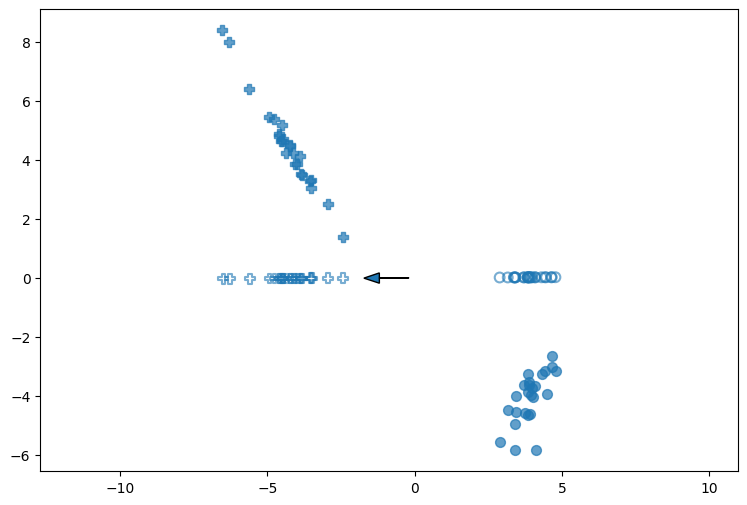

In [8]:
# show dataset
plt.figure(1, figsize=[9, 6])
plt.axis('equal')
markers = ['o', 'P']
for i, marker in enumerate(markers):
    plt.scatter(dataset_x[dataset_y==i, 0],
                dataset_x[dataset_y==i, 1],
                marker=marker,
                s=50,
                alpha=0.7,
                c='tab:blue')

# show projected data
markers = [MarkerStyle('o', fillstyle='none'),
           MarkerStyle('P', fillstyle='none')]
for i, marker in enumerate(markers):
    plt.scatter(p_dataset_x[dataset_y==i, 0],
                p_dataset_x[dataset_y==i, 1],
                marker=marker,
                s=50,
                alpha=0.6,
                c='tab:blue')


# show w direction
plt.arrow(w[0]*b, w[1]*b, w[0], w[1], head_width=0.35)

print('w: ')
print(w)
print('b: ')
print(b)

plt.show()
